In [1]:
import numpy as np
import cv2 as cv
import glob

In [2]:
# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

In [4]:
# Define the chess board rows and columns
rows = 11
cols = 8

In [5]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((rows*cols,3), np.float32)
objp[:,:2] = np.mgrid[0:rows,0:cols].T.reshape(-1,2)
 
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

In [6]:
images = glob.glob('*.bmp')

In [7]:
import cv2
for fname in images:
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
 
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (rows, cols), None)
 
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
 
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)
 
        # Draw and display the corners
        cv.drawChessboardCorners(img, (rows, cols), corners2, ret)
        cv.imshow('img', img)
        cv.waitKey(500)

In [8]:
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

In [9]:
mtx

array([[2.51871226e+03, 0.00000000e+00, 1.08045518e+03],
       [0.00000000e+00, 2.51898572e+03, 8.10445150e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [10]:
rvecs

(array([[ 0.08408605],
        [-0.22289696],
        [ 0.34257825]]),
 array([[-0.13263158],
        [ 0.03787585],
        [ 0.08311908]]))

In [11]:
tvecs

(array([[-0.92128639],
        [-4.70643807],
        [32.50237739]]),
 array([[-1.45624132],
        [-3.14147107],
        [36.32171909]]))

In [12]:
corners

array([[[ 979.62915,  592.7919 ]],

       [[1048.5057 ,  597.94507]],

       [[1117.7013 ,  603.28406]],

       [[1187.0565 ,  608.66907]],

       [[1256.5367 ,  613.9695 ]],

       [[1326.0482 ,  619.4644 ]],

       [[1395.795  ,  624.9137 ]],

       [[1465.6465 ,  630.35016]],

       [[1535.518  ,  635.7168 ]],

       [[1605.4448 ,  641.28705]],

       [[1675.4097 ,  646.8596 ]],

       [[ 973.2992 ,  660.6599 ]],

       [[1042.3809 ,  665.9693 ]],

       [[1111.8807 ,  671.3873 ]],

       [[1181.4454 ,  676.98206]],

       [[1251.2025 ,  682.40027]],

       [[1321.0782 ,  687.7247 ]],

       [[1391.0511 ,  693.29877]],

       [[1461.0896 ,  698.9029 ]],

       [[1531.2657 ,  704.4069 ]],

       [[1601.4307 ,  709.93   ]],

       [[1671.622  ,  715.5236 ]],

       [[ 966.87286,  729.0249 ]],

       [[1036.3387 ,  734.5553 ]],

       [[1106.0409 ,  740.0329 ]],

       [[1175.9144 ,  745.59644]],

       [[1245.8661 ,  751.1587 ]],

       [[1315.9698 ,  756.66

In [13]:
import matplotlib.pyplot as plt

In [14]:
R = cv.Rodrigues(rvecs[0])[0]

In [15]:
R

array([[ 0.91768338, -0.34195928, -0.20228956],
       [ 0.32348712,  0.93868232, -0.11929619],
       [ 0.23068007,  0.04403806,  0.97203259]])

In [16]:
tvec = tvecs[0].squeeze()

In [17]:
H = np.dot(mtx, np.concatenate((R[:,:2], tvec[:,None]), axis = 1) )/tvec[-1] 

In [18]:
H

array([[ 7.87825404e+01, -2.50355801e+01,  1.00906178e+03],
       [ 3.08227602e+01,  7.38474534e+01,  4.45688747e+02],
       [ 7.09732922e-03,  1.35491809e-03,  1.00000000e+00]])

In [19]:
img1 = cv2.imread('1.bmp', 0)
img2 = cv2.imread('2.bmp', 0)

In [20]:
pts1 = corners.reshape(-1,1,2).astype(np.float32)
dst1 = cv2.perspectiveTransform(pts1, H)

In [21]:
pts1

array([[[ 979.62915,  592.7919 ]],

       [[1048.5057 ,  597.94507]],

       [[1117.7013 ,  603.28406]],

       [[1187.0565 ,  608.66907]],

       [[1256.5367 ,  613.9695 ]],

       [[1326.0482 ,  619.4644 ]],

       [[1395.795  ,  624.9137 ]],

       [[1465.6465 ,  630.35016]],

       [[1535.518  ,  635.7168 ]],

       [[1605.4448 ,  641.28705]],

       [[1675.4097 ,  646.8596 ]],

       [[ 973.2992 ,  660.6599 ]],

       [[1042.3809 ,  665.9693 ]],

       [[1111.8807 ,  671.3873 ]],

       [[1181.4454 ,  676.98206]],

       [[1251.2025 ,  682.40027]],

       [[1321.0782 ,  687.7247 ]],

       [[1391.0511 ,  693.29877]],

       [[1461.0896 ,  698.9029 ]],

       [[1531.2657 ,  704.4069 ]],

       [[1601.4307 ,  709.93   ]],

       [[1671.622  ,  715.5236 ]],

       [[ 966.87286,  729.0249 ]],

       [[1036.3387 ,  734.5553 ]],

       [[1106.0409 ,  740.0329 ]],

       [[1175.9144 ,  745.59644]],

       [[1245.8661 ,  751.1587 ]],

       [[1315.9698 ,  756.66

In [22]:
dst1

array([[[ 7234.618 ,  8499.005 ]],

       [[ 7419.467 ,  8314.123 ]],

       [[ 7585.654 ,  8148.364 ]],

       [[ 7735.8916,  7998.6035]],

       [[ 7872.713 ,  7861.9746]],

       [[ 7996.8057,  7738.5264]],

       [[ 8110.887 ,  7624.886 ]],

       [[ 8215.828 ,  7520.3037]],

       [[ 8312.723 ,  7423.586 ]],

       [[ 8401.786 ,  7335.0996]],

       [[ 8484.376 ,  7253.0435]],

       [[ 6946.301 ,  9000.775 ]],

       [[ 7145.624 ,  8790.418 ]],

       [[ 7325.462 ,  8600.822 ]],

       [[ 7487.3794,  8430.542 ]],

       [[ 7635.2866,  8274.543 ]],

       [[ 7770.5923,  8131.605 ]],

       [[ 7893.8022,  8001.963 ]],

       [[ 8006.954 ,  7882.955 ]],

       [[ 8111.707 ,  7772.56  ]],

       [[ 8208.445 ,  7670.6504]],

       [[ 8297.966 ,  7576.4688]],

       [[ 6658.792 ,  9501.035 ]],

       [[ 6872.8354,  9265.125 ]],

       [[ 7066.0005,  9052.056 ]],

       [[ 7240.596 ,  8859.633 ]],

       [[ 7399.1963,  8684.823 ]],

       [[ 7544.2246,  8524.8

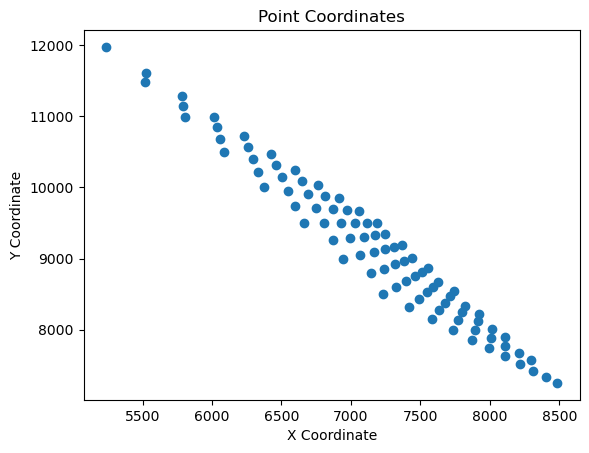

In [24]:
import matplotlib.pyplot as plt

points = [[ 7234.618 ,  8499.005 ],

       [ 7419.467 ,  8314.123 ],

       [ 7585.654 ,  8148.364 ],

       [ 7735.8916,  7998.6035],

       [ 7872.713 ,  7861.9746],

       [ 7996.8057,  7738.5264],

       [ 8110.887 ,  7624.886 ],

       [ 8215.828 ,  7520.3037],

       [ 8312.723 ,  7423.586 ],

       [ 8401.786 ,  7335.0996],

       [ 8484.376 ,  7253.0435],

       [ 6946.301 ,  9000.775 ],

       [ 7145.624 ,  8790.418 ],

       [ 7325.462 ,  8600.822 ],

       [ 7487.3794,  8430.542 ],

       [ 7635.2866,  8274.543 ],

       [ 7770.5923,  8131.605 ],

       [ 7893.8022,  8001.963 ],

       [ 8006.954 ,  7882.955 ],

       [ 8111.707 ,  7772.56  ],

       [ 8208.445 ,  7670.6504],

       [ 8297.966 ,  7576.4688],

       [ 6658.792 ,  9501.035 ],

       [ 6872.8354,  9265.125 ],

       [ 7066.0005,  9052.056 ],

       [ 7240.596 ,  8859.633 ],

       [ 7399.1963,  8684.823 ],

       [ 7544.2246,  8524.841 ],

       [ 7676.5825,  8379.239 ],

       [ 7798.751 ,  8244.474 ],

       [ 7911.5225,  8120.0786],

       [ 8015.387 ,  8005.7764],

       [ 8111.566 ,  7899.9224],

       [ 6372.0337, 10000.122 ],

       [ 6601.141 ,  9737.747 ],

       [ 6806.896 ,  9502.495 ],

       [ 6993.6772,  9288.833 ],

       [ 7163.3286,  9094.665 ],

       [ 7318.1997,  8917.525 ],

       [ 7460.394 ,  8754.649 ],

       [ 7591.    ,  8605.168 ],

       [ 7711.1367,  8467.857 ],

       [ 7822.4697,  8340.536 ],

       [ 7925.708 ,  8222.35  ],

       [ 6087.071 , 10496.247 ],

       [ 6329.816 , 10209.819 ],

       [ 6549.219 ,  9950.695 ],

       [ 6747.359 ,  9716.814 ],

       [ 6927.9106,  9503.733 ],

       [ 7092.891 ,  9308.787 ],

       [ 7244.1455,  9130.157 ],

       [ 7383.369 ,  8965.64  ],

       [ 7511.9814,  8813.5   ],

       [ 7630.2046,  8674.123 ],

       [ 7740.197 ,  8544.171 ],

       [ 5803.015 , 10990.873 ],

       [ 6060.363 , 10678.669 ],

       [ 6292.192 , 10397.645 ],

       [ 6502.687 , 10142.278 ],

       [ 6693.9795,  9910.238 ],

       [ 6868.5273,  9698.603 ],

       [ 7029.0933,  9503.666 ],

       [ 7176.353 ,  9325.039 ],

       [ 7312.3877,  9159.896 ],

       [ 7438.4443,  9006.843 ],

       [ 7555.3804,  8864.8   ],

       [ 5519.947 , 11483.541 ],

       [ 5791.253 , 11146.919 ],

       [ 6036.2456, 10842.752 ],

       [ 6258.219 , 10567.131 ],

       [ 6460.37  , 10316.04  ],

       [ 6644.9453, 10086.866 ],

       [ 6814.524 ,  9876.167 ],

       [ 6970.089 ,  9682.977 ],

       [ 7114.0146,  9504.09  ],

       [ 7246.978 ,  9338.995 ],

       [ 7370.457 ,  9185.489 ],

       [ 5238.514 , 11973.618 ],

       [ 5523.8936, 11612.166 ],

       [ 5781.7246, 11285.444 ],

       [ 6015.2305, 10989.603 ],

       [ 6227.9834, 10719.921 ],

       [ 6422.1406, 10473.851 ],

       [ 6600.4634, 10247.8125],

       [ 6764.605 , 10039.668 ],

       [ 6916.0195,  9847.688 ],

       [ 7056.3735,  9669.675 ],

       [ 7186.399 ,  9504.753 ]]


# 分离x和y坐标
x_coords = [point[0] for point in points]
y_coords = [point[1] for point in points]

# 创建散点图
plt.scatter(x_coords, y_coords)

# 为图表添加标题和坐标轴标签
plt.title('Point Coordinates')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

# 显示图表
plt.show()
